In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

# import data
df = pd.read_csv("/goinfre/hrami/python/python_for_data/data_jobs.csv")

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [ ]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

In [30]:
df_da_us = df_da_us.explode('job_skills')
df_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_most_pay  = df_us_group.sort_values(by='median', ascending=False).head(10)
df_most_skills = df_us_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

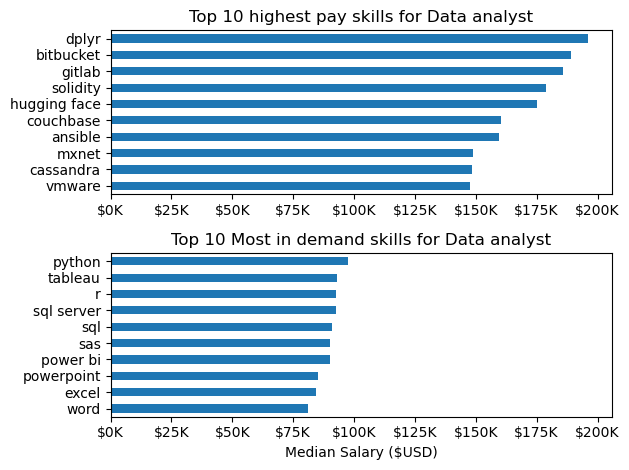

In [44]:
fig, ax = plt.subplots(2, 1)

df_most_pay.plot(kind='barh',y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest pay skills for Data analyst')
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
df_most_skills.plot(kind='barh',y='median', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most in demand skills for Data analyst')
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary ($USD)")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
fig.tight_layout()